In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
# read csv
df = pd.read_csv('tmdb_5000_movies.csv')

In [59]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [60]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [61]:
df['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4803, dtype: object

In [62]:
df['release_date'].apply(lambda x: str(x)[:4] )

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: release_date, Length: 4803, dtype: object

In [63]:
df[df['release_date'].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


In [64]:
df[~df['release_date'].isna()]['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4802, dtype: object

In [65]:
df = df[~df['release_date'].isna()]

In [66]:
df[df['release_date'].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


In [69]:
df['release_date'].apply(lambda x: x[:4])

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: release_date, Length: 4802, dtype: object

In [77]:
df['year'] = df['release_date'].apply(lambda x: int(x[:4]))

In [78]:
df.groupby('year').count()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
year,,,,,,,,,,,,,,,,,,,,
1916,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1925,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
1927,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1929,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2
1930,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,231,231,104,231,231,231,231,231,231,231,231,231,231,231,231,231,181,231,231,231
2014,238,238,81,238,238,238,238,237,238,238,238,238,238,238,238,238,170,238,238,238
2015,216,216,106,216,216,216,216,214,216,216,216,216,216,214,216,216,162,216,216,216


In [79]:
df.groupby('year').count()['id']

year
1916      1
1925      1
1927      1
1929      2
1930      1
       ... 
2013    231
2014    238
2015    216
2016    104
2017      1
Name: id, Length: 90, dtype: int64

Text(0, 0.5, 'count')

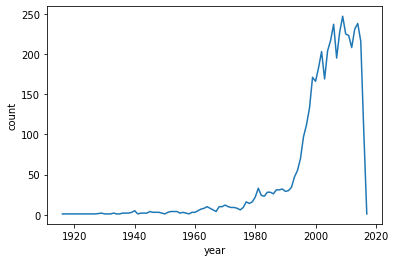

In [81]:
plt.plot(df.groupby('year').count()['id'])
plt.xlabel('year')
plt.ylabel('count')

In [82]:
# revenue

In [83]:
df = df[df['revenue'] != 0]

In [87]:
df.groupby('year').median()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
year,,,,,,,
1916,385907.0,3059.0,3.232447,8394751.0,197.0,7.4,60.0
1925,245000.0,3060.0,0.785744,22000000.0,151.0,7.0,21.0
1927,92620000.0,19.0,32.351527,650422.0,153.0,8.0,657.0
1929,379000.0,65203.0,0.968865,4358000.0,100.0,5.0,19.0
1930,3950000.0,22301.0,8.484123,8000000.0,127.0,6.1,19.0
...,...,...,...,...,...,...,...
2012,25500000.0,79864.5,26.034775,64793040.0,101.0,6.2,681.5
2013,27220000.0,116741.0,33.003828,63464861.0,109.0,6.4,956.0
2014,25000000.0,209451.0,38.734940,80383290.0,108.0,6.3,957.0


In [88]:
df.groupby('year').median()['revenue']

year
1916      8394751.0
1925     22000000.0
1927       650422.0
1929      4358000.0
1930      8000000.0
           ...     
2012     64793040.0
2013     63464861.0
2014     80383290.0
2015     84769058.0
2016    108286421.0
Name: revenue, Length: 89, dtype: float64

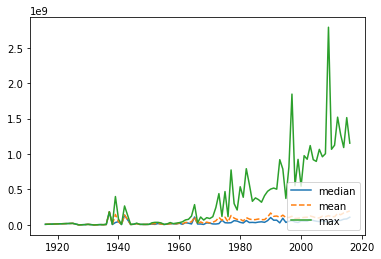

In [98]:
plt.plot(df.groupby('year').median()['revenue'], label='median')
plt.plot(df.groupby('year').mean()['revenue'], label='mean', ls='--')
plt.plot(df.groupby('year')['revenue'].max(), label='max')
plt.legend(loc=4)